<a href="https://colab.research.google.com/github/hhur0104/hh_adv_methods_project/blob/main/Data71200_HH_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d5fe6c70874ca18a7391c34bfdc6e38459089adbc1f55769c73c224087d0b260
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Step 1. Loading the dataset from my project github repo


In [ ]:
# Loading data
# Original data source (Kaggle): https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
stroke = pd.read_csv("https://raw.githubusercontent.com/hhur0104/hh_adv_methods_project/main/healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## STEP 2. Split the data ####

In [ ]:
# Input features
X = stroke.drop(["stroke"], axis=1)
print("X: \n" , X.head())

X: 
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  
0        Private          Urban             228.69  36.6  formerly smoked  
1  Self-employed          Rural             202.21   NaN     never smoked  
2        Private          Rural             105.92  32.5     never smoked  
3        Private          Urban             171.23  34.4           smokes  
4  Self-employed          Rural             174.12  24.0     never smoked  


In [ ]:
# Label
y = stroke["stroke"]
print("y: \n" , y.head())

y: 
 0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


Using stratified shuffle split strategy, I examined the proportions of the two classes 0, 1 in 'stroke' column to see if the breakdowns look similar to the dataset before split. 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

In [ ]:
print(stroke["stroke"].value_counts())
print(stroke["stroke"].value_counts(normalize=True))

0    4861
1     249
Name: stroke, dtype: int64
0    0.951272
1    0.048728
Name: stroke, dtype: float64


In [ ]:
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

0    972
1     50
Name: stroke, dtype: int64
0    0.951076
1    0.048924
Name: stroke, dtype: float64


Looking at the print outs, the breakdowns between two classes are fairly similar to the original. Classes are well represented. 



## Step 3. Exploring training set 


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 845 to 5052
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3918 non-null   float64
 10  smoking_status     4088 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 383.2+ KB


In [ ]:
X_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3918.000000
mean,36547.666585,43.353288,0.097114,0.054061,106.317167,28.922180
std,21238.482961,22.596816,0.296148,0.226165,45.259652,7.928378
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17621.500000,26.000000,0.000000,0.000000,77.312500,23.600000
50%,36963.500000,45.000000,0.000000,0.000000,91.945000,28.000000
75%,54787.750000,61.000000,0.000000,0.000000,114.197500,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


## Step 4. Data Cleaning

In [ ]:
# Get counts of NaNs in each column
for i in stroke.columns :
    print('column ', i,': ' ,stroke[i].isna().sum())

column  id :  0
column  gender :  0
column  age :  0
column  hypertension :  0
column  heart_disease :  0
column  ever_married :  0
column  work_type :  0
column  Residence_type :  0
column  avg_glucose_level :  0
column  bmi :  201
column  smoking_status :  0
column  stroke :  0


Looks like we have some samples missing BMI information. Since test and training sets are picked from th original dataset, I am going to pick out these missing BMI samples and drop them from the original set. Then do split again to create cleaned version of training and test set.

In [ ]:
stroke_cln = stroke[~stroke['bmi'].isna()]
print("Before: ", stroke.shape)
print("After: ",stroke_cln.shape)

X_cln = stroke_cln.drop(["stroke"], axis=1)
y_cln = stroke_cln["stroke"]

for i in stroke_cln.columns :
    print('column ', i,': ' ,stroke_cln[i].isna().sum())

Before:  (5110, 12)
After:  (4909, 12)
column  id :  0
column  gender :  0
column  age :  0
column  hypertension :  0
column  heart_disease :  0
column  ever_married :  0
column  work_type :  0
column  Residence_type :  0
column  avg_glucose_level :  0
column  bmi :  0
column  smoking_status :  0
column  stroke :  0


Now there are no more columns with missing values. Time to split the cleaned data.

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_cln, y_cln):
    X_train_cln = X_cln.iloc[train_index]
    X_test_cln = X_cln.iloc[test_index]
    y_train_cln = y_cln.iloc[train_index]
    y_test_cln = y_cln.iloc[test_index]

print(stroke_cln['stroke'].value_counts(normalize=True))
print(y_train_cln.value_counts())
print(y_train_cln.value_counts(normalize=True))
print(y_test_cln.value_counts())
print(y_test_cln.value_counts(normalize=True))

0    0.957425
1    0.042575
Name: stroke, dtype: float64
0    3760
1     167
Name: stroke, dtype: int64
0    0.957474
1    0.042526
Name: stroke, dtype: float64
0    940
1     42
Name: stroke, dtype: int64
0    0.95723
1    0.04277
Name: stroke, dtype: float64


## Step 5. Visualization

In [ ]:
print(X_train_cln.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3927 entries, 1473 to 1808
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3927 non-null   int64  
 1   gender             3927 non-null   object 
 2   age                3927 non-null   float64
 3   hypertension       3927 non-null   int64  
 4   heart_disease      3927 non-null   int64  
 5   ever_married       3927 non-null   object 
 6   work_type          3927 non-null   object 
 7   Residence_type     3927 non-null   object 
 8   avg_glucose_level  3927 non-null   float64
 9   bmi                3927 non-null   float64
 10  smoking_status     3927 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 368.2+ KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d65048450>,
      dtype=object)

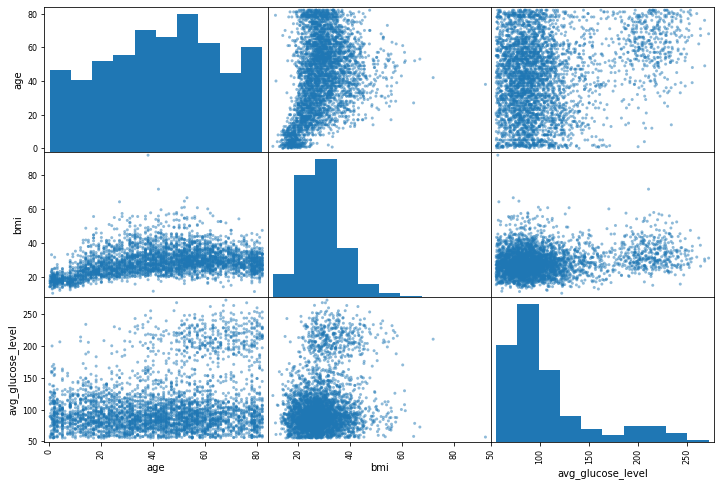

In [ ]:
attributes = ["age", "bmi", "avg_glucose_level"]
scatter_matrix(X_train_cln[attributes], figsize=(12, 8))

Three features: age, bmi and glucose level do not show much of colinearity.

Urban    2069
Rural    2019
Name: Residence_type, dtype: int64


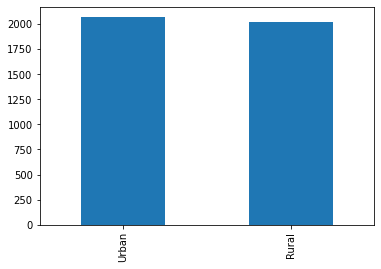

In [ ]:
# Bar plots to see distribution of column 'Residence_type'

print(X_train_cln['Residence_type'].value_counts())
X_train_cln['Residence_type'].value_counts().plot(kind='bar')

Private          2332
Self-employed     667
children          554
Govt_job          522
Never_worked       13
Name: work_type, dtype: int64


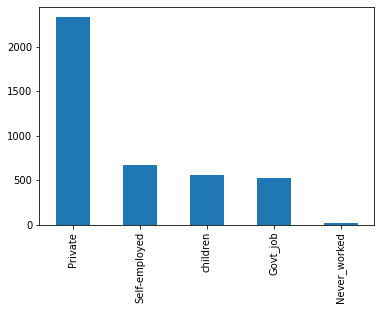

In [ ]:
print(X_train_cln['work_type'].value_counts())
X_train_cln['work_type'].value_counts().plot(kind='bar')

Two residence type, urban and rural are evenly numbered through out the train data set. Private work_type is the most prevalent in the training data set, and very small number of samples, 13, are in the category 'Never-worked'.

## Step 6. Transformation

I am going to transform 'bmi' and 'avg_glucose_level'. Though the distribution of the feature glucose level looks a bit skewed, I don't think transformation of these features is really necessary. However, for the sake of practice, I investigated how it looks after the transformation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d62922790>,
      dtype=object)

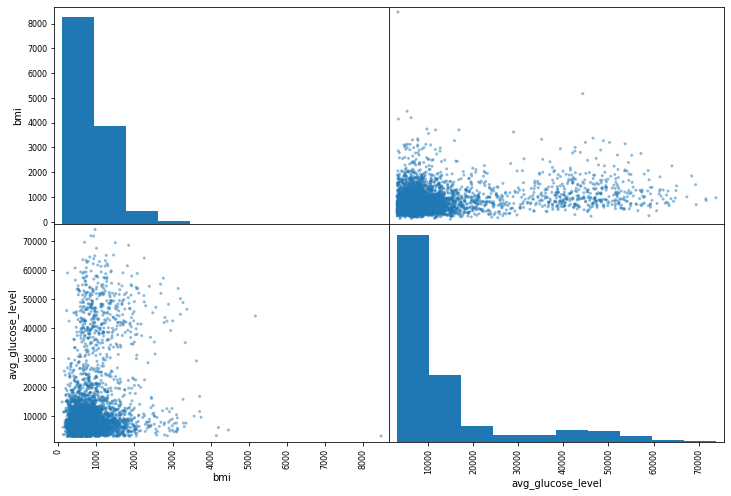

In [ ]:
scatter_matrix(X_train_cln[['bmi','avg_glucose_level']]**2, figsize=(12, 8))

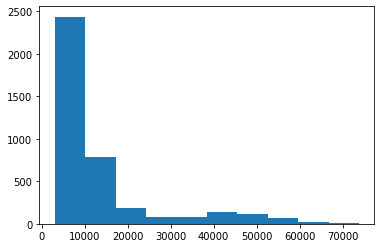

In [ ]:
plt.hist(X_train_cln['avg_glucose_level'].values.reshape(-1, 1)**2, bins=10)
plt.show()

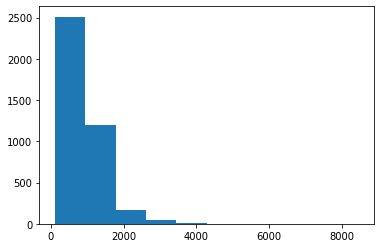

In [ ]:
plt.hist(X_train_cln['bmi'].values.reshape(-1, 1)**2, bins=10)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d6258fad0>,
      dtype=object)

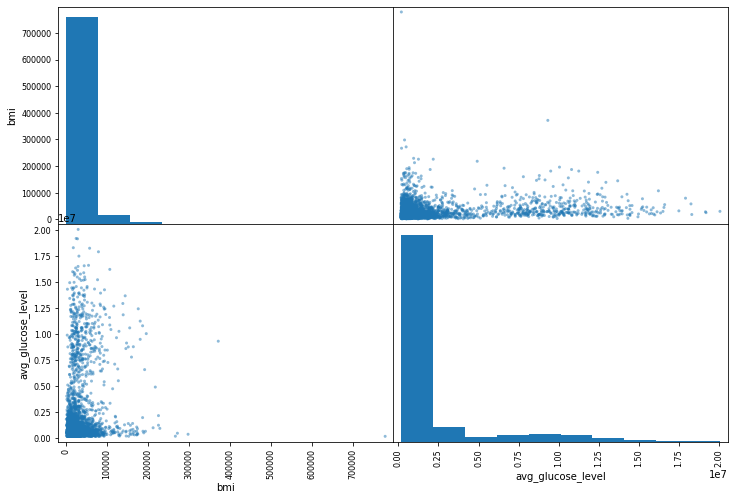

In [ ]:
scatter_matrix(X_train_cln[['bmi','avg_glucose_level']]**3, figsize=(12, 8))

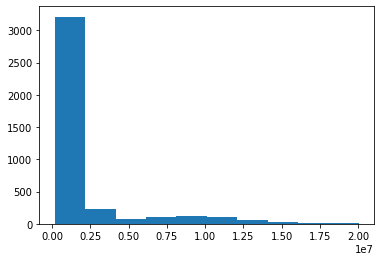

In [ ]:
plt.hist(X_train_cln['avg_glucose_level'].values.reshape(-1, 1)**3, bins=10)
plt.show()

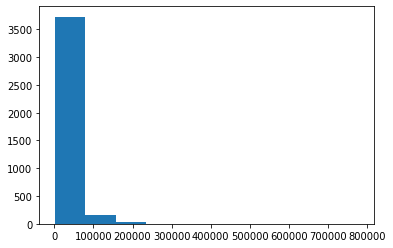

In [ ]:
plt.hist(X_train_cln['bmi'].values.reshape(-1, 1)**3, bins=10)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d62c16810>,
      dtype=object)

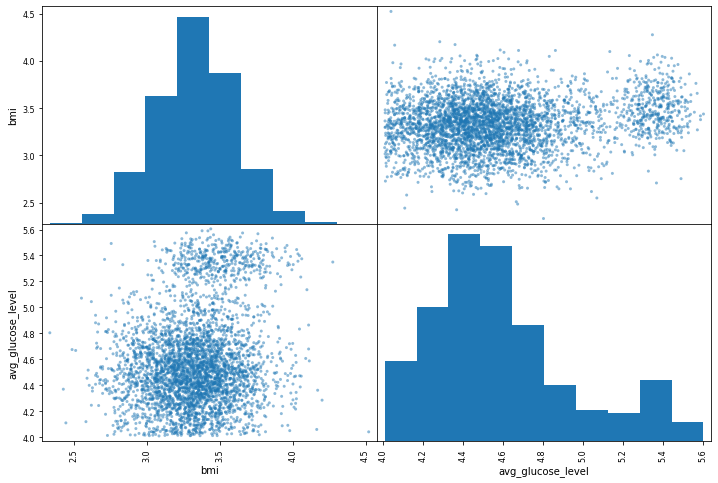

In [ ]:
scatter_matrix(np.log(X_train_cln[['bmi','avg_glucose_level']]), figsize=(12, 8))

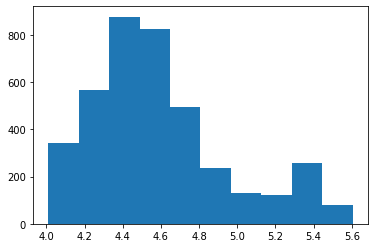

In [ ]:
plt.hist(np.log(X_train_cln['avg_glucose_level'].values.reshape(-1, 1)), bins=10)
plt.show()

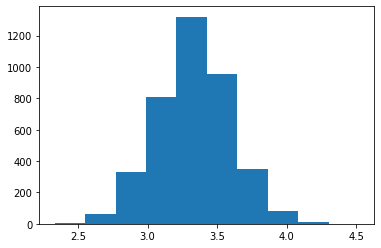

In [ ]:
plt.hist(np.log(X_train_cln['bmi'].values.reshape(-1, 1)), bins=10)
plt.show()